# 1-Objective - A company wants to predict the electricity demand accurately to optimise power generation
# 2-Approach -  The historical data is collected over the years(time series data) including information about energy and timestamp
# 3-Result - The accurate prediction of energy demand in future years so company can generate energy accordingly and save operation cost and also prevent energy generation shortage

# 1- Loading the Dataset

In [586]:
import pandas as pd
df = pd.read_csv("TimeSeries_TotalSolarGen_and_Load_IT_2016.csv")
df

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0
...,...,...,...
8779,2016-12-31T19:00:00Z,31154.0,0
8780,2016-12-31T20:00:00Z,28342.0,0
8781,2016-12-31T21:00:00Z,26496.0,0
8782,2016-12-31T22:00:00Z,25276.0,0


# 2- Understadning the dataset

In [163]:
df.size

26352

In [165]:
df.shape

(8784, 3)

In [167]:
df.columns

Index(['utc_timestamp', 'IT_load_new', 'IT_solar_generation'], dtype='object')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   utc_timestamp        8784 non-null   object 
 1   IT_load_new          8712 non-null   float64
 2   IT_solar_generation  8784 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


In [171]:
df.describe()

,IT_load_new,IT_solar_generation
count,8712.000000,8784.000000
mean,32262.212236,2049.831853
std,7288.629858,2845.846870
min,16716.000000,0.000000
25%,25909.500000,0.000000
50%,31654.500000,68.000000
75%,38685.750000,3923.500000
max,48986.000000,15824.000000


In [173]:
df["IT_solar_generation"].sample(20)

1826       0
1949     143
3347    5630
4181    1494
8383     683
7250       0
3257     365
7505       0
5239    4518
8596       0
2793    6681
7302    1836
6071       0
4753       0
846      210
8442       0
4143    4349
3496    2303
6033    6369
8083       0
Name: IT_solar_generation, dtype: int64

# 3- Data Cleaning

In [518]:
df.isnull().sum()

utc_timestamp           0
IT_load_new            72
IT_solar_generation     0
dtype: int64

In [588]:
df["IT_load_new"]=df["IT_load_new"].interpolate()  # fills estimating value based on surrounding value

# or
# df["IT_load_new"].fillna(method="ffill",inplace=True)  # works good with time series data fll previous value

In [590]:
df.isnull().sum()

utc_timestamp          0
IT_load_new            0
IT_solar_generation    0
dtype: int64

In [592]:
df.duplicated().sum()

0

In [594]:
df["utc_timestamp"] = pd.to_datetime(df["utc_timestamp"])

In [596]:
df["hour"] = df["utc_timestamp"].dt.hour
df["cat"] = df["hour"].apply(lambda x:"day" if 9<x<18 else "Night")

# 4 -Visualise the Data

Text(0, 0.5, 'Solar')

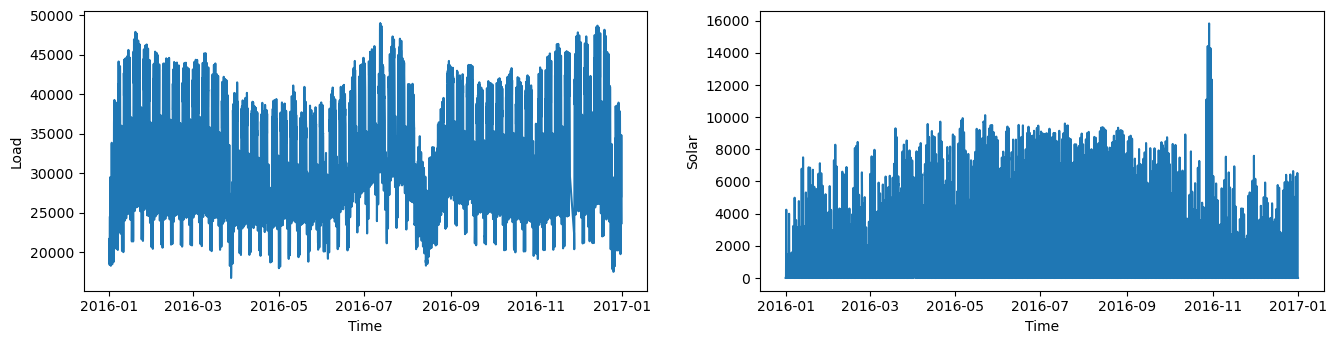

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(df["utc_timestamp"],df["IT_load_new"],label="load")
plt.xlabel("Time")
plt.ylabel("Load")
plt.subplot(2,2,2)
plt.plot(df["utc_timestamp"],df["IT_solar_generation"],label="solar")
plt.xlabel("Time")
plt.ylabel("Solar")

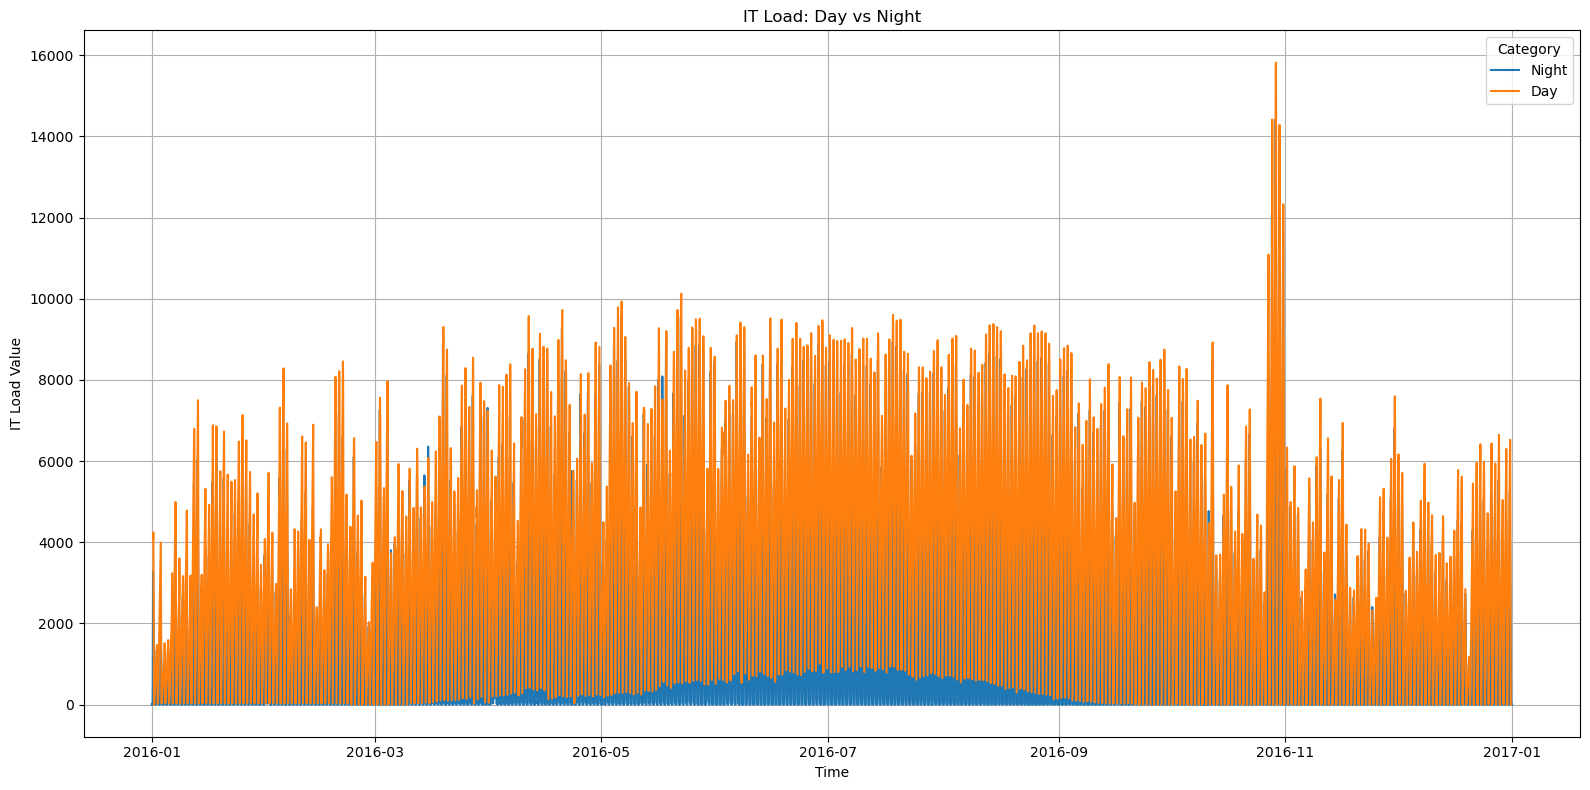

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(Night["utc_timestamp"], Night["IT_solar_generation"], label="Night")
plt.plot(Day["utc_timestamp"], Day["IT_solar_generation"], label="Day")

plt.xlabel("Time")
plt.ylabel("IT Load Value")
plt.title("IT Load: Day vs Night")
plt.legend(title="Category")  # Show legend
plt.grid(True)
plt.tight_layout()
plt.show()  # Don't forget this!


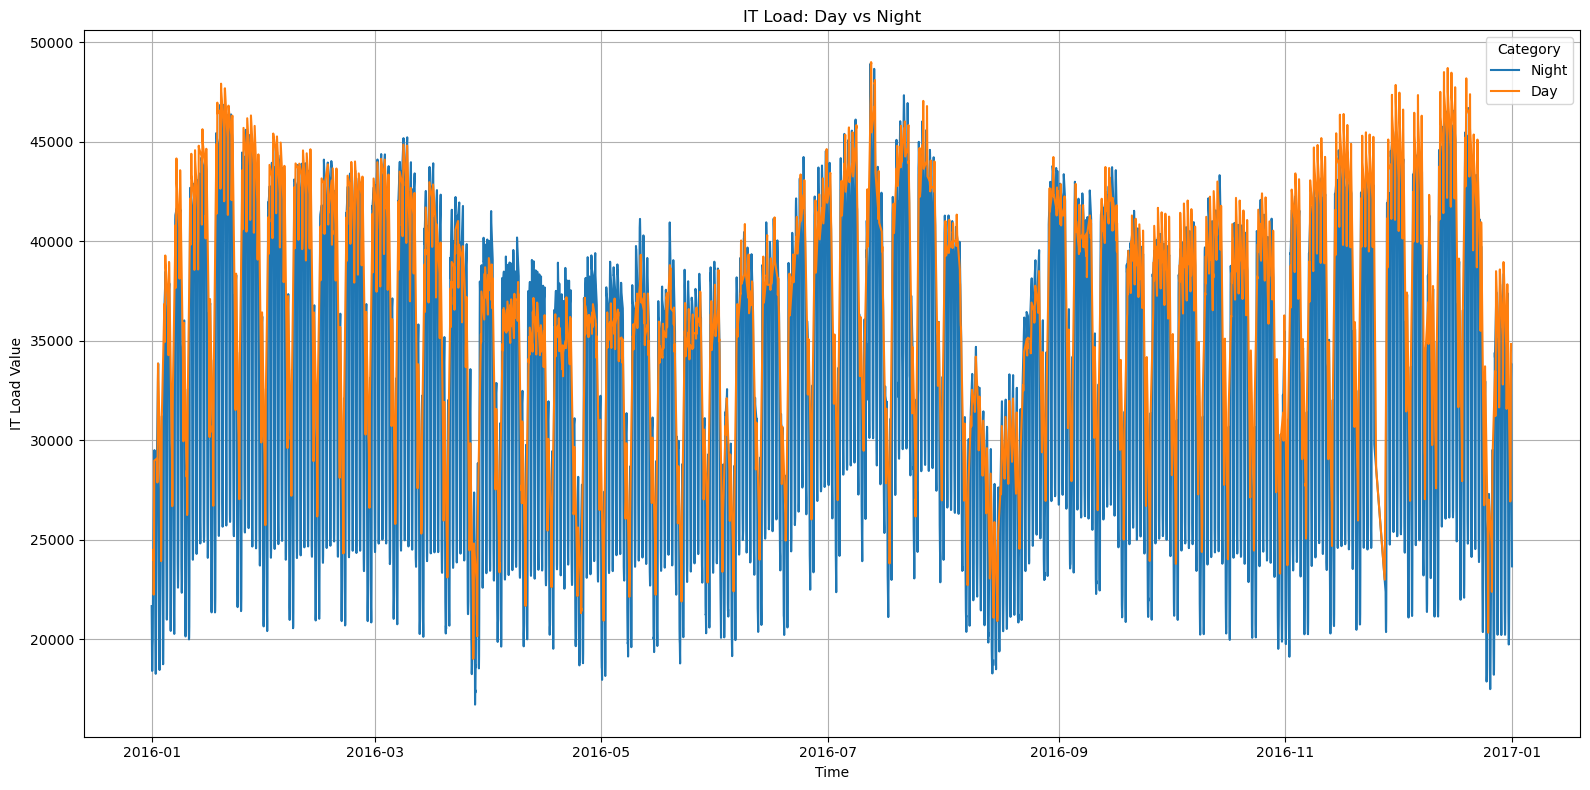

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(Night["utc_timestamp"], Night["IT_load_new"], label="Night")
plt.plot(Day["utc_timestamp"], Day["IT_load_new"], label="Day")

plt.xlabel("Time")
plt.ylabel("IT Load Value")
plt.title("IT Load: Day vs Night")
plt.legend(title="Category")  # Show legend
plt.grid(True)
plt.tight_layout()
plt.show()  # Don't forget this!


# 5 - Checking Seasonality or Trends in Dataset

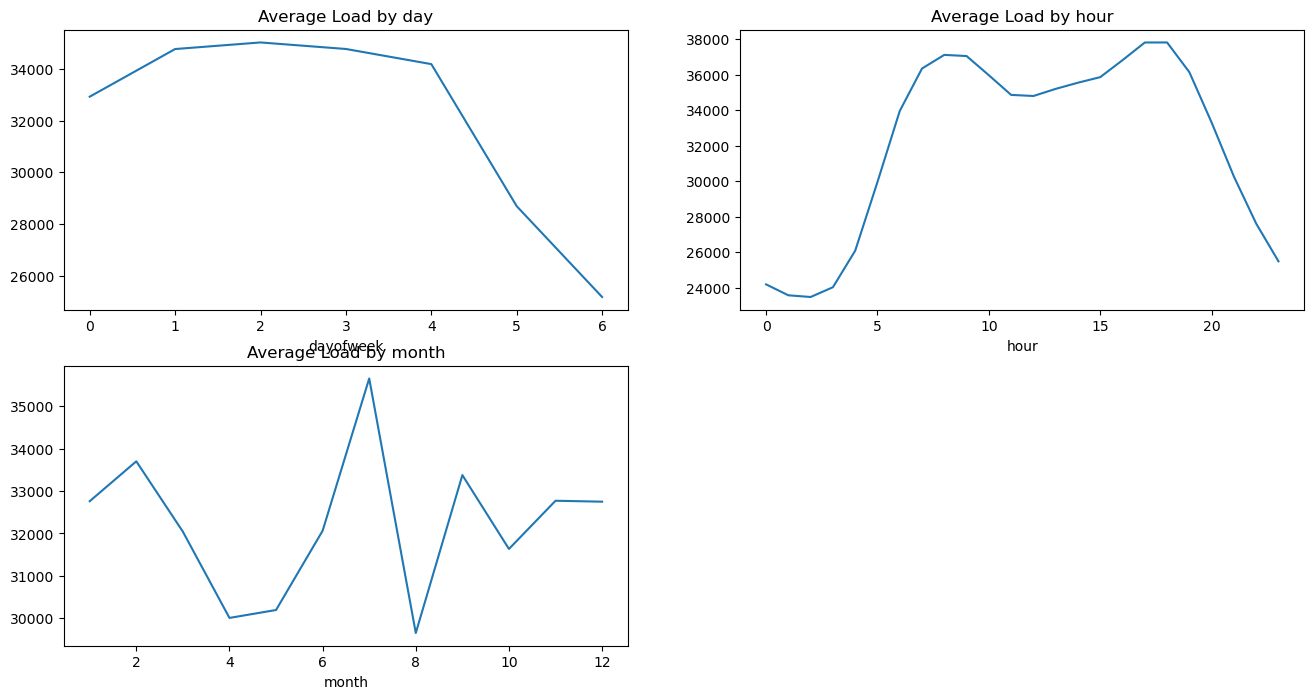

In [301]:
df["dayofweek"] = df.index.dayofweek
df["hour"] = df.index.hour
df["month"] = df.index.month
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df.groupby("dayofweek")["IT_load_new"].mean().plot(title="Average Load by day")
plt.subplot(2,2,2)
df.groupby("hour")["IT_load_new"].mean().plot(title="Average Load by hour")
plt.subplot(2,2,3)
df.groupby("month")["IT_load_new"].mean().plot(title="Average Load by month")
plt.show()

#Observation-:

Hourly Seasonality:
1-Enegy Demand is lowest during the night (0–5 AM), rises sharply in the morning, stays high during the day, and drops again at night—indicating strong daily seasonality.
    
Monthly Seasonality:
Energy Demand is highest between months 6 to 8, and lower in other months, likely due to seasonal temperature effects.

Weekly Seasonality:
Energy Demand is higher at the start of the week and decreases towards the weekend, reflecting reduced activity on weekends.


# 6 - Checking Stationarity of Data(Using Dickey fuller test)

In [24]:
from statsmodels.tsa.stattools import adfuller
test_results = adfuller(df["IT_load_new"])

In [ ]:
# Dickey Fuller test Hypothesis say that-:
# H0 - The test does not have stationarity
# H1 - The test  have stationarity

In [26]:
def ad_fuller_test(value):
     result = adfuller(value)
     labels = ["ADF Test Statistic","p-value","Logs used","No of observations used","critical values"]
     for value,label in zip(result,labels):
           print(label,':',value)       
     if result[1]<0.05:
          print("There is enough evidence to reject null.So it have stationarity")
     else:
         print("There is not enough evidence to reject null.So it does not have stationarity")
ad_fuller_test(df["IT_load_new"])

ADF Test Statistic : -12.014417970970293
p-value : 3.1264247075105875e-22
Logs used : 37
No of observations used : 8746
critical values : {'1%': -3.43109790993778, '5%': -2.861870526484161, '10%': -2.566945934275714}
There is enough evidence to reject null.So it have stationarity


#Observations
1 - The p value for IT_load _new is very very small less than 0.05 so we reject the null hypothesis and accepted that the IT_load_new is stationary

2- Similarly the p value for IT_solar_generation is very very small less than 0.05 so we reject the null hypothesis and accepted that the IT_solar_generation is stationary

Thus both the features are stationary we can move further in building a model

Since dataset here is stationary and Non seasonal so we will go with ARIMA Model first

ARIMA, which stands for AutoRegressive Integrated Moving Average, is a class of models that explains a given time series based on its own past values, that is, its own lags and the lagged forecast errors.

Any 'non-seasonal' time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

p is the order of the AR term (number of lags of Y to be used as predictors or no of next months or years we wanna predict). 
d is the order of the MA term (moving average). d is the number of differencing required to make the time series stationary. In our case, since the series are already stationary, d=0 for both series.
q is the order of MA term(Moving average) tells how many past errors to use to improve prediction
We need to determine the optimal values for p and q. To do this, we'll look at the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.

# 7- Plotting ACF(Anti correlation function) and PACF(Partial Anti Correlation function) to get P,q values for Arima model

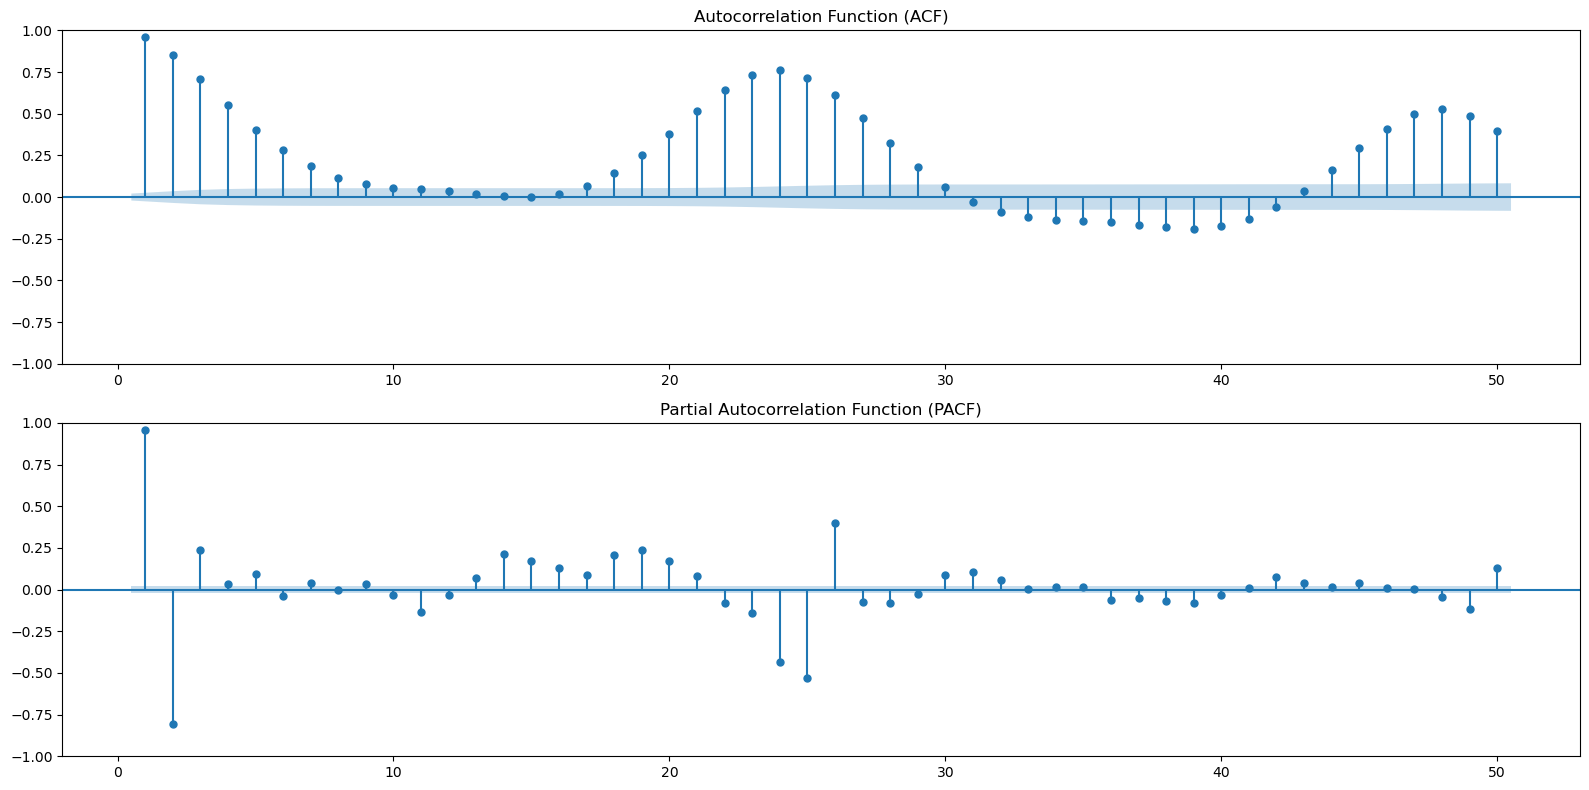

In [179]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# ACF plot
ax1 = plt.subplot(2, 1, 1)
plot_acf(df["IT_load_new"], lags=50, zero=False, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")

# PACF plot
ax2 = plt.subplot(2, 1, 2)
plot_pacf(df["IT_load_new"], lags=50, zero=False, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [181]:
# Observation
#1- From above we can tell that in PACF there is suddent shud off and drop in value at x = 2 so we will take parameter p =2
#2 - SImilary from ACF there is exponentialy decrease in value starting from 2 so we will also take q =2

# 8 - Making a ARIMA model

In [601]:
# Splitting dataset
split_point =int(len(df["IT_load_new"])*0.8)
X_train = df["IT_load_new"][:split_point]
X_test= df["IT_load_new"][split_point:]


In [603]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


model0 = ARIMA(X_train.values,order = (2,0,2))
model0_fit = model0.fit()
prediction0 = model0_fit.predict(start = len(X_train),end=len(X_train)+len(X_test)-1)
rmse = np.sqrt(mean_squared_error(X_test,prediction0))
rmse

7808.84205512589

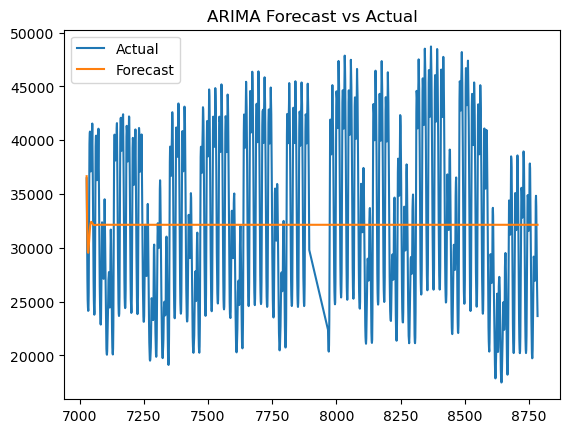

In [605]:
import matplotlib.pyplot as plt

plt.plot(X_test.index, X_test, label='Actual')
plt.plot(X_test.index, prediction0, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [ ]:
#Observation-:

1 - The ARIMA model resulted in a Root Mean Squared Error (RMSE) of 7808.84, indicating poor prediction accuracy for energy production.
2 - The forecast vs. actual graph shows a flat line in ARIMA’s forecasted values, clearly suggesting that the model failed to learn any meaningful pattern from the data.

#Reason-:

1 - The data shows seasonality, and ARIMA is not effective in learning patterns when seasonality or trends are present in the dataset.
2 - The primary issue lies in the non-linearity and high randomness (noise) present in the data.
3 - ARIMA is designed for linear time series and struggles to model complex non-linear patterns, which leads to inaccurate predictions and high RMSE values.

#Solution-:

1 - We will use Seasonal ARIMA (SARIMAX), which has similar functionalities to ARIMA but is specifically designed to handle seasonality and trend more effectively and accurately.

# 9- Making SARIMAX Model to cover seasonality

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(X_train.values,order=(2,0,2),seasonal_order=(2,0,2,24))
model1_fit = model.fit()
 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54052D+00    |proj g|=  7.74113D-01


 This problem is unconstrained.



At iterate    5    f=  8.19486D+00    |proj g|=  8.28255D-03

At iterate   10    f=  8.19200D+00    |proj g|=  1.41598D-02

At iterate   15    f=  8.19075D+00    |proj g|=  1.85738D-03

At iterate   20    f=  8.19069D+00    |proj g|=  1.63306D-03

At iterate   25    f=  8.18751D+00    |proj g|=  2.01697D-02

At iterate   30    f=  8.16065D+00    |proj g|=  1.22810D-02

At iterate   35    f=  8.15903D+00    |proj g|=  2.81612D-03

At iterate   40    f=  8.15244D+00    |proj g|=  1.17135D-02
  ys=-9.785E-01  -gs= 4.739E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.08989D+00    |proj g|=  2.07973D-02
  ys=-3.468E-04  -gs= 1.474E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.08296D+00    |proj g|=  1.79702D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    109      3     2     0   1.797D-02   8.083D+00
  F =   8.0829647556819193     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [607]:
prediction1 = model1_fit.predict(start = len(X_train),end=len(X_train)+len(X_test)-1)
rmse = np.sqrt(mean_squared_error(X_test,prediction1))
rmse          



5667.339093530985

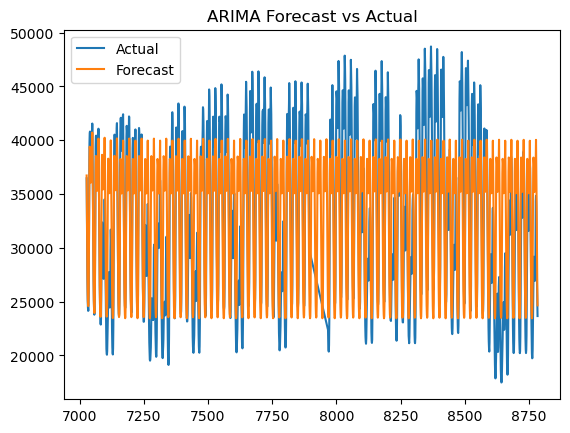

In [609]:
import matplotlib.pyplot as plt

plt.plot(X_test.index, X_test, label='Actual')
plt.plot(X_test.index, prediction1, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

# 10-Using XGB to improve prediction and Forecasting

In [611]:
df["lag1"] = df["IT_load_new"].shift(1)
df["lag2"]  = df["IT_load_new"].shift(2)
df["lag3"]  = df["IT_load_new"].shift(3)
df["lag4"]  = df["IT_load_new"].shift(4)
df["lag5"]  = df["IT_load_new"].shift(5)
df["rolling_mean_3"] = df["IT_load_new"].rolling(window=3).mean().shift(1)    #rolling feature give a window of some rows and help model to learn pattern over windowsize
df["rolling_std_3"] = df["IT_load_new"].rolling(window=3).std().shift(1)
df["rolling_min_5"] = df["IT_load_new"].rolling(window=5).min().shift(1)
df["rolling_max_5"] = df["IT_load_new"].rolling(window=5).max().shift(1)
df["hours"] = df["utc_timestamp"].dt.hour
df["dayofweek"] = df["utc_timestamp"].dt.dayofweek
df["month"] = df["utc_timestamp"].dt.month
df["year"] = df["utc_timestamp"].dt.year

In [613]:
X = df[["lag1","lag2","lag3","lag4","lag5","rolling_mean_3","rolling_std_3","rolling_min_5","rolling_max_5",
        "hours","dayofweek","month","year"]]
y = df["IT_load_new"]

In [615]:
X = X.sort_index()
y= y.sort_index()

split_point = int(len(df["IT_load_new"])*0.8)
X_train,X_test =X[:split_point],X[split_point:]
y_train,y_test =y[:split_point],y[split_point:]

In [617]:
from xgboost import XGBRegressor
model  = XGBRegressor(n_estimators=100)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [619]:
y_pred = model.predict(X_test)

In [621]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

890.0783215422646

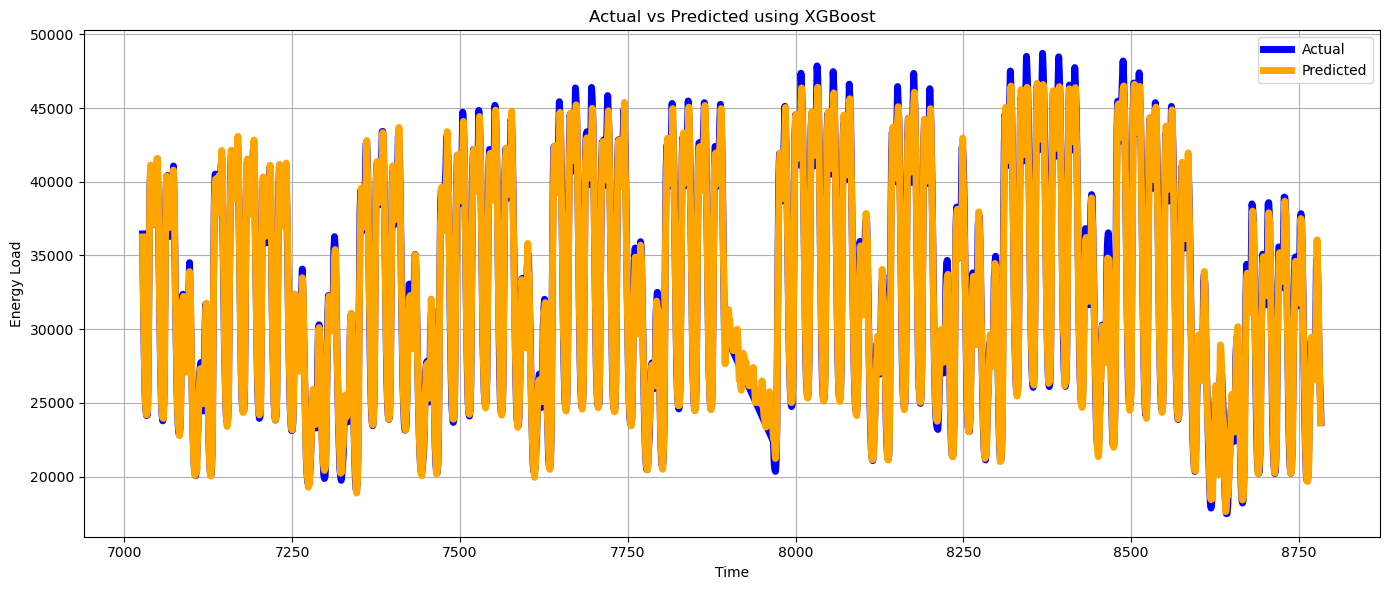

In [623]:
df.set_index("utc_timestamp",inplace=True)
plt.figure(figsize=(14, 6))

plt.plot(y_test.index, y_test, label="Actual", color='blue',linewidth=5)
plt.plot(y_test.index, y_pred, label="Predicted", color='orange',linewidth=5)

plt.title("Actual vs Predicted using XGBoost")
plt.xlabel("Time")
plt.ylabel("Energy Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


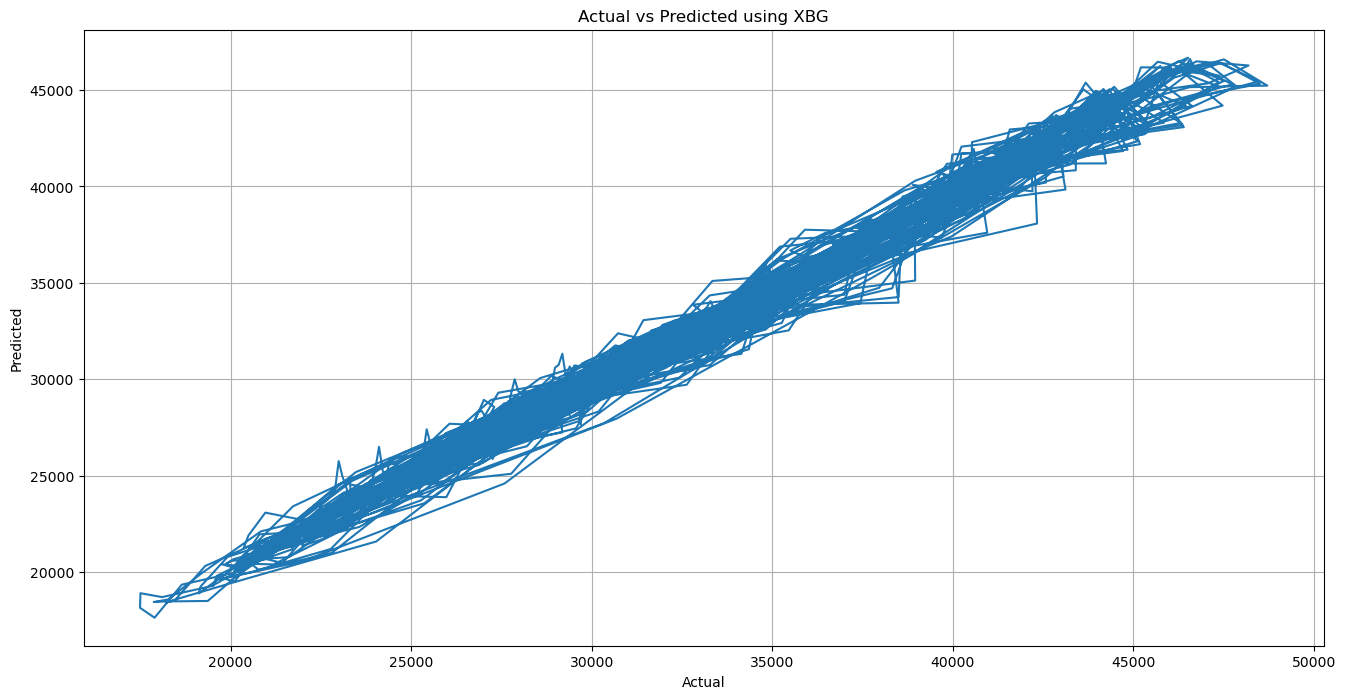

In [458]:
plt.figure(figsize=(16,8))
plt.plot(y_test,y_pred)
plt.title("Actual vs Predicted using XBG")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

# 11-Forecasting for next year using XGBRegressor

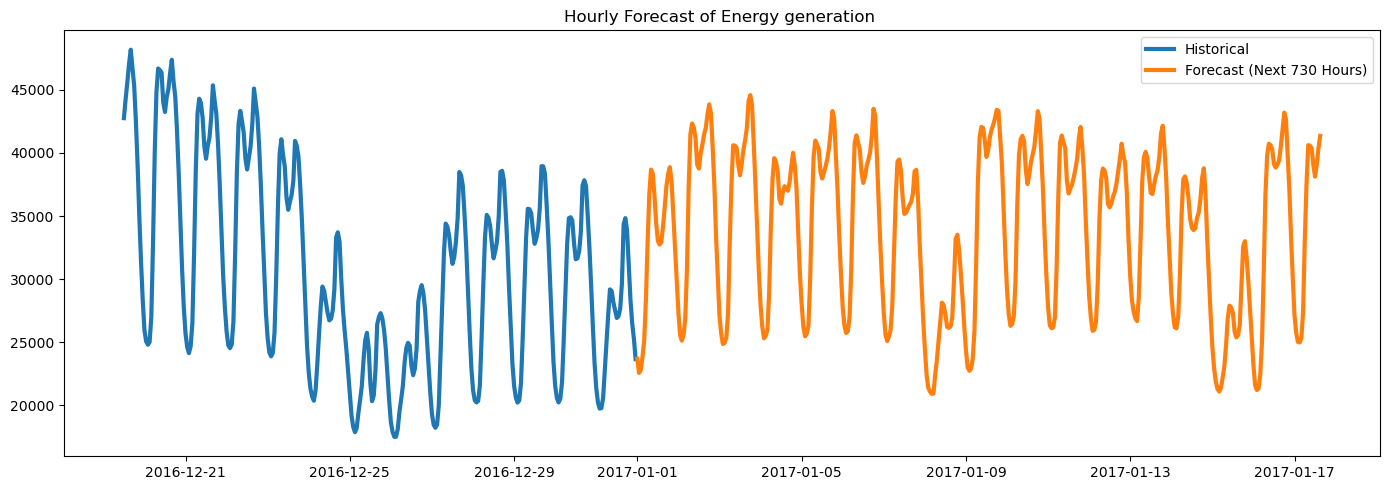

In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Initialize with last 5 known values
predicted_values = list(df["IT_load_new"].iloc[-5:])
last_timestamp = df.index[-1]

# Start with most recent input row (used for time features)
current_input = df[[
    "lag1", "lag2", "lag3", "lag4", "lag5",
    "rolling_mean_3", "rolling_std_3", "rolling_min_5", "rolling_max_5",
    "hours", "dayofweek", "month","year"
]].iloc[-1].copy()

future_preds = []
timestamps = []

for i in range(400):  # Predict next 400 hours
    # Predict next value
    input_df = pd.DataFrame([current_input])
    prediction = model.predict(input_df)[0]
    future_preds.append(prediction)

    # Advance time
    last_timestamp += timedelta(hours=1)
    timestamps.append(last_timestamp)

    # Update lag features
    lag1n = prediction
    lag2n = current_input["lag1"]
    lag3n = current_input["lag2"]
    lag4n = current_input["lag3"]
    lag5n = current_input["lag4"]

    # Update rolling features using last 5 predictions
    predicted_values.append(prediction)
    recent_window = predicted_values[-5:]

    rolling_mean_3 = np.mean(recent_window[-3:])
    rolling_std_3 = np.std(recent_window[-3:])
    rolling_min_5 = np.min(recent_window)
    rolling_max_5 = np.max(recent_window)

    # Time features
    hour = last_timestamp.hour
    dayofweek = last_timestamp.dayofweek
    month = last_timestamp.month
    year = last_timestamp.year

    # Build next input
    current_input = pd.Series({
        "lag1": lag1n,
        "lag2": lag2n,
        "lag3": lag3n,
        "lag4": lag4n,
        "lag5": lag5n,
        "rolling_mean_3": rolling_mean_3,
        "rolling_std_3": rolling_std_3,
        "rolling_min_5": rolling_min_5,
        "rolling_max_5": rolling_max_5,
        "hours": hour,
        "dayofweek": dayofweek,
        "month": month,
        "year":year
    })



# Build forecast DataFrame
forecast_df = pd.DataFrame({
    "timestamp": timestamps,
    "prediction": future_preds
}).set_index("timestamp")

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(df["IT_load_new"].tail(300), label="Historical",linewidth=3)
plt.plot(forecast_df["prediction"], label="Forecast (Next 730 Hours)",linewidth=3)
plt.title("Hourly Forecast of Energy generation ")
plt.legend()
plt.tight_layout()
plt.show()


# Part 2- Prediction Solar Prediction and Forecasting

# 1 - Checking Seasonality of Data or Trend

<Axes: title={'center': 'Seasonality by dayofweek'}, xlabel='dayofweek'>

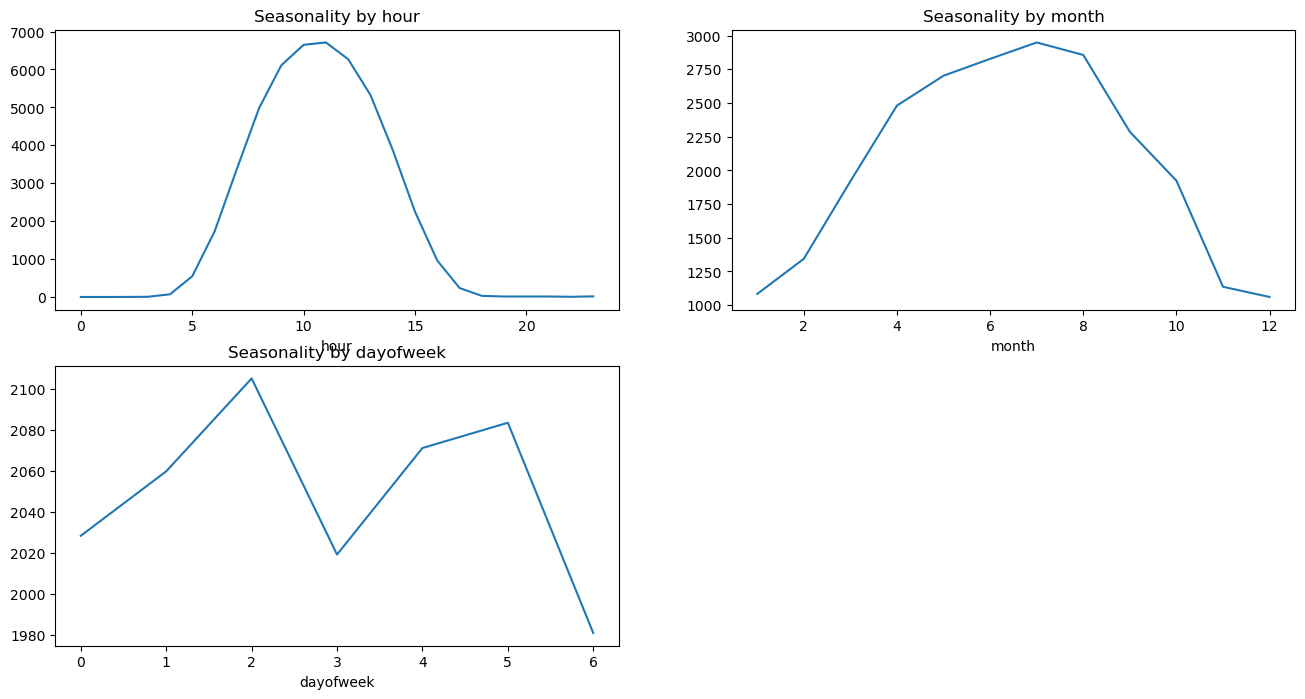

In [372]:
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df.groupby("hour")["IT_solar_generation"].mean().plot(title="Seasonality by hour")
plt.subplot(2,2,2)
df.groupby("month")["IT_solar_generation"].mean().plot(title="Seasonality by month")
plt.subplot(2,2,3)
df.groupby("dayofweek")["IT_solar_generation"].mean().plot(title="Seasonality by dayofweek")

#Observation-:

1-Solar power generation is almost zero at night and reaches its peak during the day due to sunlight, which is expected. 
This indicates clear daily seasonality.
2-Solar power generation is lower in winter months and peaks during summer, as there is more sunlight available. 
This shows monthly (or annual) seasonality as well.


# 2- Checking Stationarity using Dickey Fuller Test

In [55]:
# Testing stationarity for this
from statsmodels.tsa.stattools import adfuller

def ad_fuller_test(value):
    result =  adfuller(value)
    label = ["ADF test statistic","f-score","lags","No-of observation used","critical values"]
    for value,label in zip(result,label):
          print(label,':',value)
    if result[1]<0.05:
         print("its stationary")
    else:
        print("Not stationary")
ad_fuller_test(df["IT_solar_generation"])

ADF test statistic : -5.741334582271219
f-score : 6.265438259035802e-07
lags : 36
No-of observation used : 8747
critical values : {'1%': -3.43109782440793, '5%': -2.8618704886904087, '10%': -2.5669459141578455}
its stationary


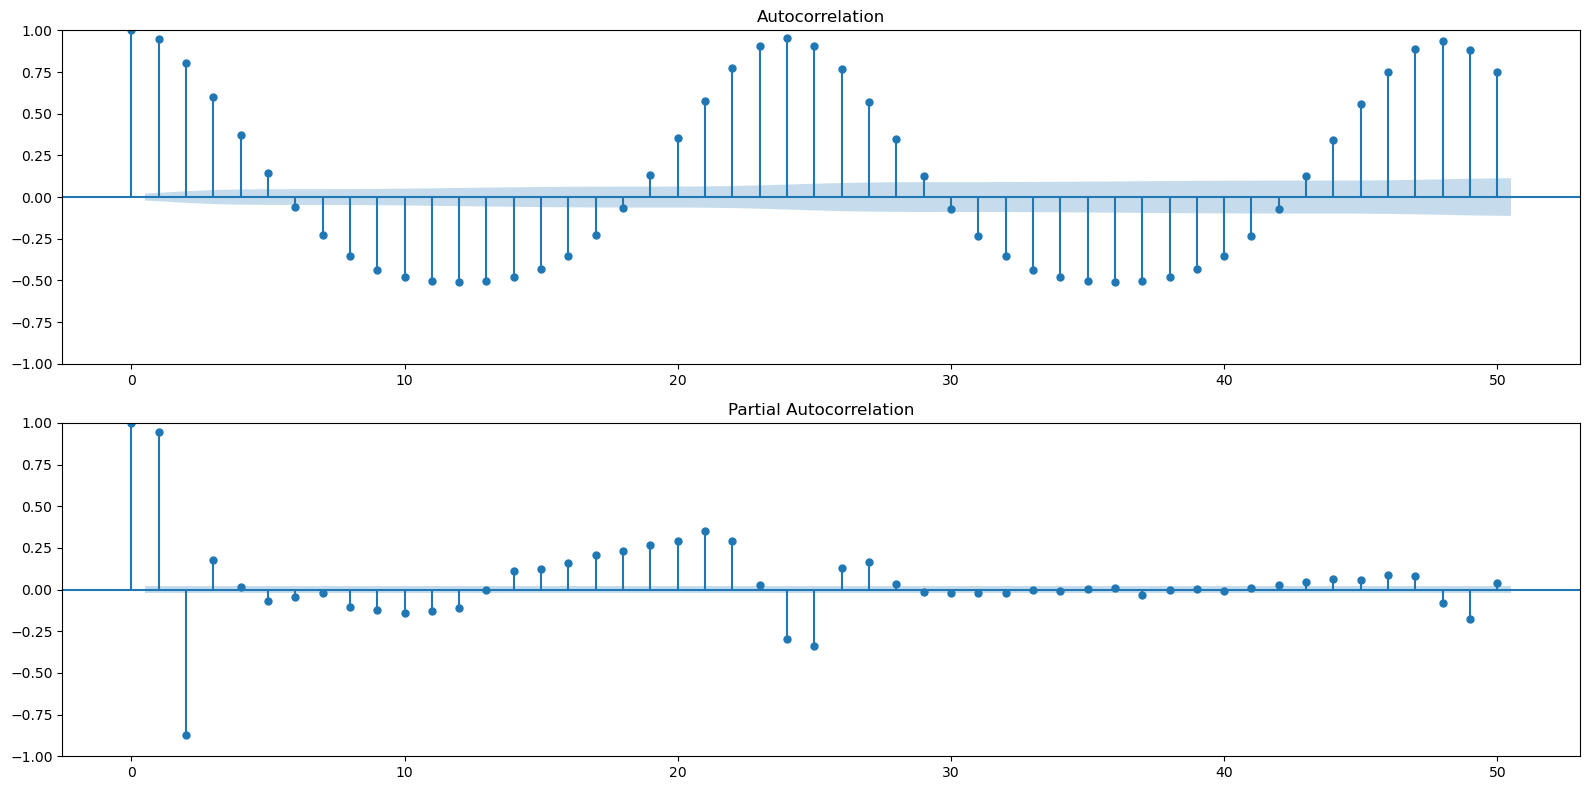

In [57]:
# plotting anticorrelation function and partital anti correlation function
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(16,8))
ax1 = plt.subplot(2,1,1)
plot_acf(df["IT_solar_generation"],lags=50,ax=ax1)
ax2= plt.subplot(2,1,2)
plot_pacf(df["IT_solar_generation"],lags=50,ax=ax2)
plt.tight_layout()
plt.show()

# 4- Making a ARIMA Model for Prediction

In [374]:
split_point = int(len(df["IT_solar_generation"])*0.8)
train3 = df["IT_solar_generation"][:split_point]
test3 = df["IT_solar_generation"][split_point:]


In [379]:
#p = 3,#q=2,d=0
from statsmodels.tsa.arima.model import ARIMA
model3 = ARIMA(train3,order=(3,0,2))
model_fit3 = model3.fit()
prediction3 = model_fit3.predict(start=len(train3), end=len(train3)+len(test3)-1)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

In [381]:
rmse = np.sqrt(mean_squared_error(test3,prediction3))
rmse

2486.2385800117395

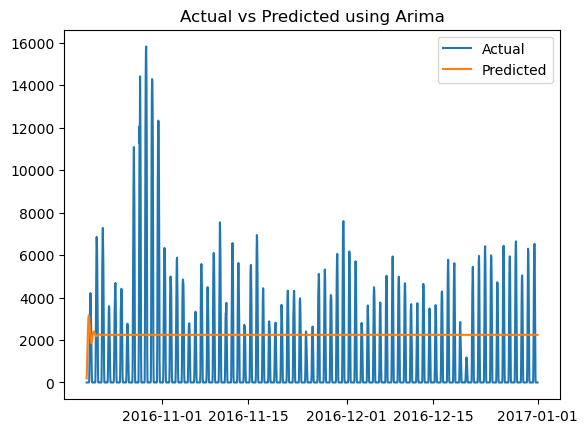

In [383]:
plt.plot(test3.index,test3,label="Actual")
plt.plot(test3.index,prediction3,label="Predicted")
plt.legend()
plt.title("Actual vs Predicted using Arima")
plt.show()

# 4- Making a SARIMAX Model for Prediction

In [389]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modeln = SARIMAX(train3,order=(3,0,2),seasonal_order=(3,0,2,24))
modeln_fit = modeln.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36806D+00    |proj g|=  3.06108D-01


 This problem is unconstrained.



At iterate    5    f=  7.21433D+00    |proj g|=  9.52343D-03

At iterate   10    f=  7.21266D+00    |proj g|=  2.05213D-03

At iterate   15    f=  7.21130D+00    |proj g|=  1.95361D-03

At iterate   20    f=  7.20710D+00    |proj g|=  3.31106D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  7.19071D+00    |proj g|=  1.32718D-02

At iterate   30    f=  7.17913D+00    |proj g|=  1.19349D-02

At iterate   35    f=  7.17852D+00    |proj g|=  3.13870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     37     71      2     0     0   4.328D-03   7.179D+00
  F =   7.1785173618376046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [394]:
predictionn = modeln_fit.predict(start = len(train3),end = len(train3)+len(test3)-1)
rmse = np.sqrt(mean_squared_error(test3,predictionn))
rmse

1377.8909687139094

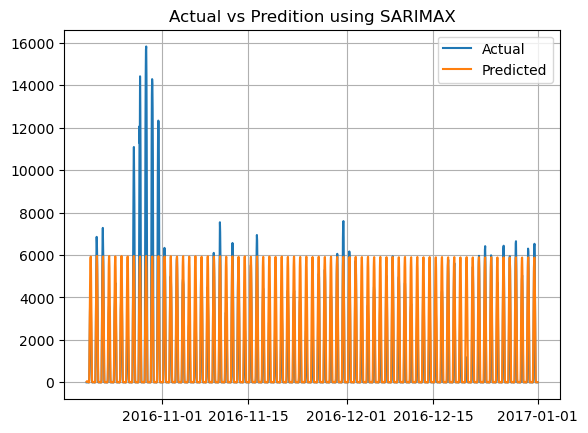

In [402]:
plt.plot(test3.index,test3,label="Actual")
plt.plot(test3.index,predictionn,label="Predicted")
plt.title("Actual vs Predition using SARIMAX")
plt.grid(True)
plt.legend()
plt.show()

# 5-Using XBGClassifier for same solar prediction

In [530]:
df.set_index("utc_timestamp",inplace=True)
df["lag1n"] = df["IT_solar_generation"].shift(1)
df["lag2n"]  = df["IT_solar_generation"].shift(2)
df["lag3n"] = df["IT_solar_generation"].shift(3)
df["rolling_std_5"] = df["IT_solar_generation"].rolling(window=5).std().shift(1)
df["rolling_mean_5"] = df["IT_solar_generation"].rolling(window=5).mean().shift(1)
df["hours"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month
X = df[["lag1n","lag2n","lag3n","rolling_std_5","rolling_mean_5","hours","dayofweek","month"]]
y = df["IT_solar_generation"]

In [532]:
X = X.sort_index()
y= y.sort_index()

split_point = int(len(df["IT_load_new"])*0.8)
X_train,X_test =X[:split_point],X[split_point:]
y_train,y_test1 =y[:split_point],y[split_point:]


model2  = XGBRegressor(n_estimators=100)
model2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [534]:
y_pred1 = model2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

890.0783215422646

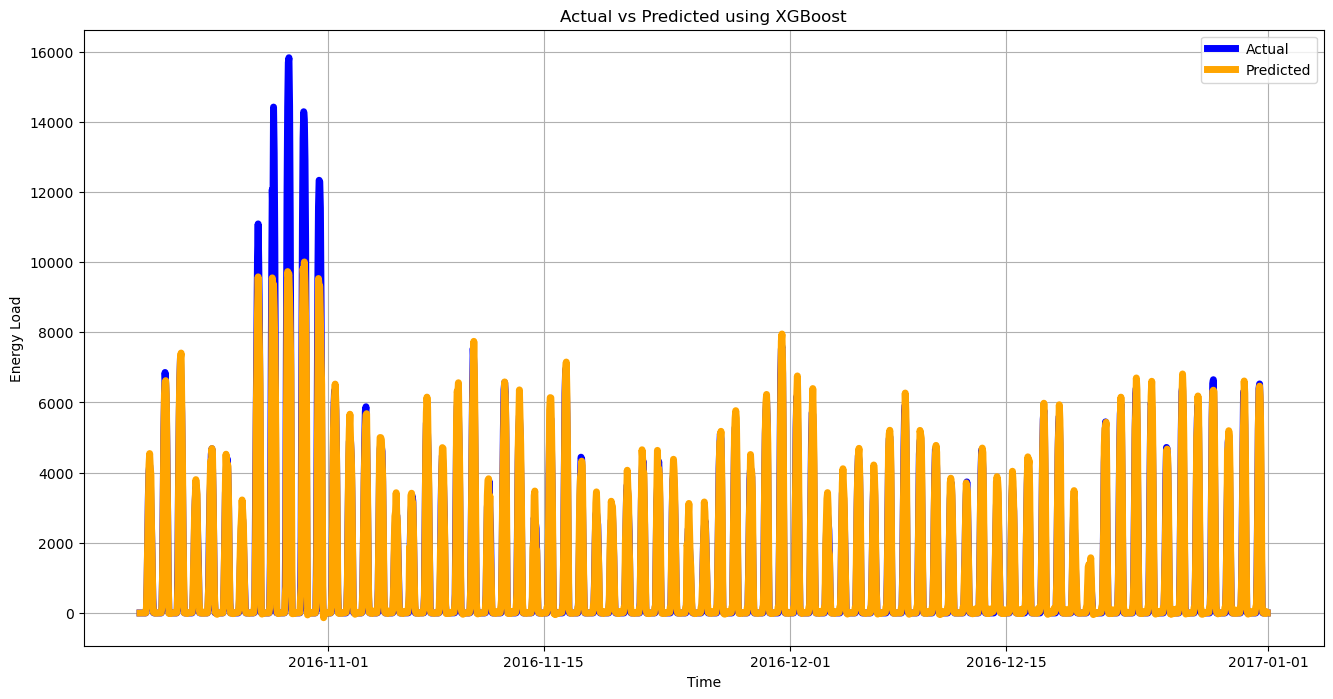

In [536]:
plt.figure(figsize=(16,8))
plt.plot(y_test1.index, y_test1, label='Actual', color='blue', linewidth=5)
plt.plot(y_test1.index, y_pred1, label='Predicted', color='orange', linewidth=5)

plt.title("Actual vs Predicted using XGBoost")
plt.xlabel("Time")
plt.ylabel("Energy Load")
plt.legend()
plt.grid(True)
plt.show()


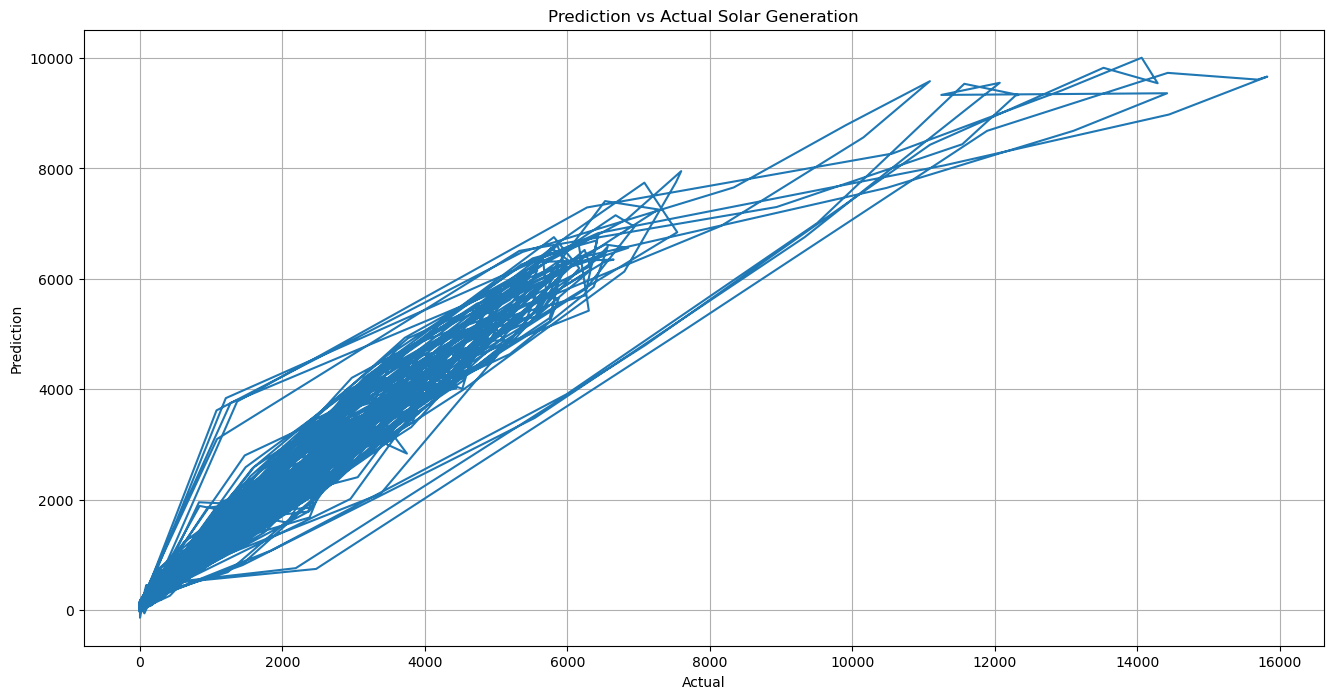

In [538]:
plt.figure(figsize=(16,8))
plt.plot(y_test1,y_pred1)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Prediction vs Actual Solar Generation")
plt.grid(True)
plt.show()

# 6- Using XGB for forecasting Solar Generation for next 1 Month

In [253]:
future_pred = []
timestamp = []
predicted_values= list(df["IT_solar_generation"].iloc[-5:])  # Start with last 5 values
current_index = df.index[-1]

current_input = df[["lag1n", "lag2n", "lag3n", "rolling_std_5", "rolling_mean_5", "hours", "dayofweek", "month"]].iloc[-1].copy()

for i in range(720):
    current = pd.DataFrame([current_input])
    prediction = model2.predict(current)[0]
    future_pred.append(prediction)

    
    predicted_values.append(prediction)
    recent_window = predicted_values[-5:]
    rolling_std_5 = np.std(recent_window)
    rolling_mean_5 = np.mean(recent_window)

    current_index += pd.Timedelta(hours=1)
    timestamp.append(current_index)

    lag1 = prediction
    lag2 = current_input["lag1n"]
    lag3 = current_input["lag2n"]
    hours = current_index.hour
    dayofweek = current_index.dayofweek
    month = current_index.month

    current_input = pd.Series({
        "lag1n": lag1,
        "lag2n": lag2,
        "lag3n": lag3,
        "rolling_std_5": rolling_std_5,
        "rolling_mean_5": rolling_mean_5,
        "hours": hours,
        "dayofweek": dayofweek,
        "month": month
    })

forecast_df = pd.DataFrame({
      "timestamp":timestamp,
      "values":future_pred}).set_index("timestamp")





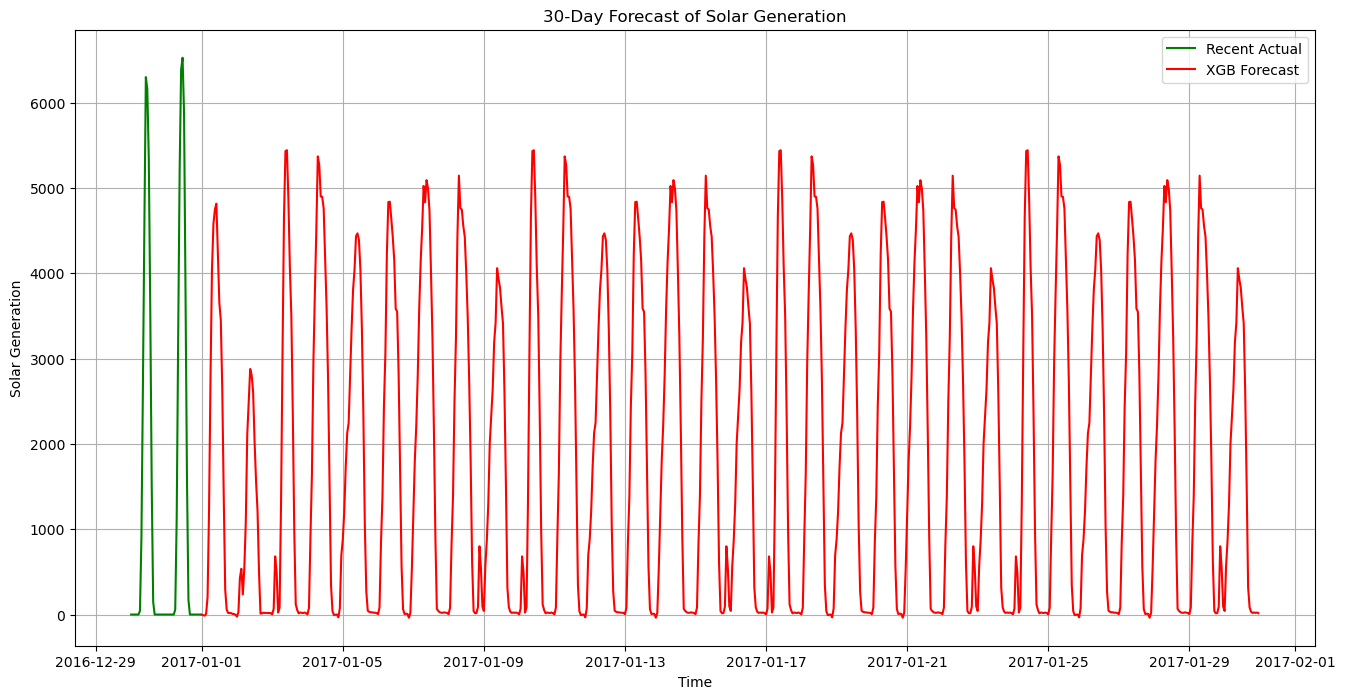

In [265]:
recent_actual = df["IT_solar_generation"].iloc[-48:]
recent_index = df.index[-48:]

plt.figure(figsize=(16, 8))
plt.plot(recent_index, recent_actual, label="Recent Actual", color="green")
plt.plot(forecast_df.index, forecast_df["values"], label="XGB Forecast", color="red")
plt.title("30-Day Forecast of Solar Generation")
plt.xlabel("Time")
plt.ylabel("Solar Generation")
plt.grid(True)
plt.legend()
plt.show()


# 7 - Anomaly Detection in Dataset using (Isolation Forest)

In [548]:
from sklearn.ensemble import IsolationForest
import numpy as np

data = df[["IT_solar_generation"]].copy()
data = data.dropna()
data

,IT_solar_generation
utc_timestamp,
2016-01-01 00:00:00+00:00,1
2016-01-01 01:00:00+00:00,0
2016-01-01 02:00:00+00:00,0
2016-01-01 03:00:00+00:00,0
2016-01-01 04:00:00+00:00,0
...,...
2016-12-31 19:00:00+00:00,0
2016-12-31 20:00:00+00:00,0
2016-12-31 21:00:00+00:00,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [552]:
from sklearn.preprocessing import StandardScaler

# Define your feature matrix
X = df[["lag1n", "lag2n", "lag3n", "rolling_std_5", "rolling_mean_5", "hours", "dayofweek", "month"]]

# Scale the features correctly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Number of anomalies: 238


/var/folders/02/bqdg6sy929v6ddf025k87q7w0000gn/T/ipykernel_55549/1145774396.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daylight["anomalies"] = iso_forest.predict(X_scaled)


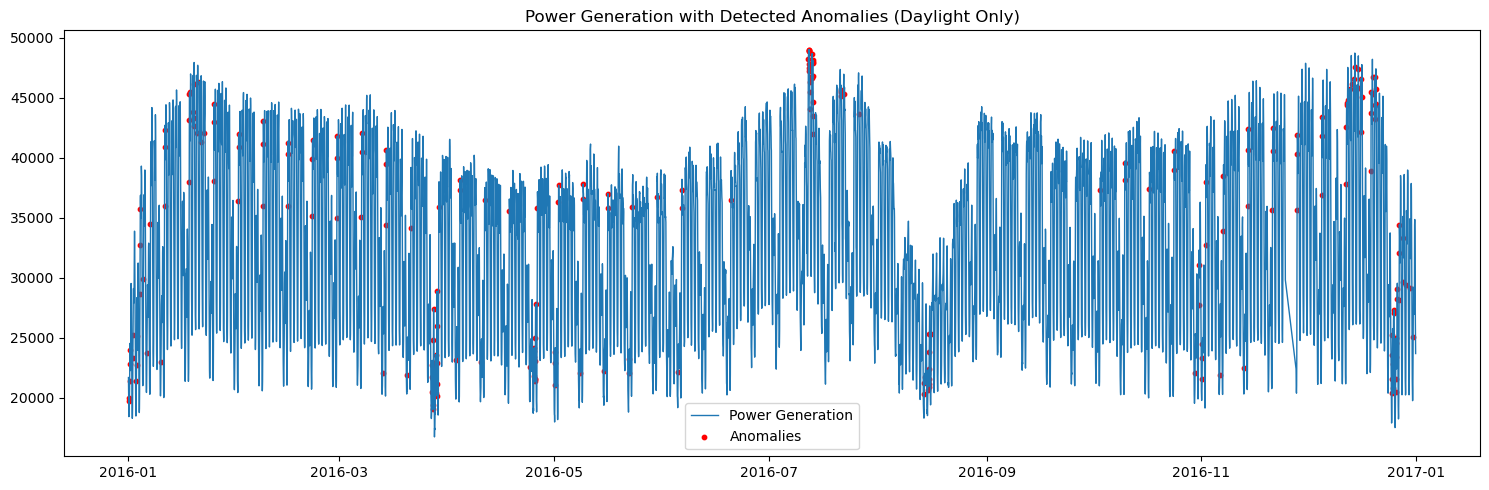

In [645]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 0: Initialize anomaly column as "normal" for all
df["anomalies"] = 1

# Step 1: Filter only daylight hours (to avoid flagging night-time zero generation)
df_daylight = df[(df["hours"] >= 6) & (df["hours"] <= 18)]

# Step 2: Prepare feature matrix for daylight data
X = df_daylight[[
    "lag1", "lag2", "lag3", "lag4", "lag5",
    "rolling_mean_3", "rolling_std_3", "rolling_min_5", "rolling_max_5",
    "hours", "dayofweek", "month", "year"
]]

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Fit Isolation Forest on daylight data
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

# Step 5: Predict anomalies (-1 = anomaly, 1 = normal)
df_daylight["anomalies"] = iso_forest.predict(X_scaled)

# Step 6: Assign daylight anomaly results back to original df
df.loc[df_daylight.index, "anomalies"] = df_daylight["anomalies"]

# Step 7: Count anomalies
anomaly_count = len(df[df["anomalies"] == -1])
print("Number of anomalies:", anomaly_count)

# Step 8: Plot results
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["IT_load_new"], label="Power Generation", linewidth=1)
plt.scatter(df[df["anomalies"] == -1].index,
            df[df["anomalies"] == -1]["IT_load_new"],
            color='red', label="Anomalies", s=10)
plt.legend()
plt.title("Power Generation with Detected Anomalies (Daylight Only)")
plt.tight_layout()
plt.show()


#Anomaly detection using Isolation Forest was applied to daylight-only power generation data to avoid false positives from expected nighttime drops. The model flagged 238 points as anomalies out of ~4700 daylight records, indicating a generally stable and consistent generation pattern with only minor irregularities — likely due to weather conditions or short-term system fluctuations.

# 8- Decision Making based on Energy and Solar generation Forecasting

# Forecast of Power Geeneration by IT-:
1 - The IT Energyy demand forecast shows a consistent M-type pattern, with regular dips and peaks throughout the day.

2 - The forecast indicates a steady and stable pattern of energy demand over the next 30 days, with no signs of unexpected drops or spikes.

3 - Therefore, there is no need for emergency power backups or battery systems at this time to a comapny, as energy demand appears reliable and consistent to recent demand.

# -Forecast of Solar Energy Generation-:

1 - The solar generation forecast shows a consistent daily pattern over the next 30 days. 
Generation remains near zero until around 4–6 AM, then begins to rise with sunrise, peaking between 8 AM and 4 PM, and 
Then drops sharply as the sun sets, which is exactly what we expect in solar-based generation systems.

2 - An important insight is that the forecasted peak generation is lower (around 5000) compared to the recent actuals (which reached 6000+). This drop in peak values suggests that in the coming days, there may be reduced sunlight availability, possibly due to cloudy weather, shorter daylight hours, or rainy conditions.

3 - Given this, it's wise to factor in weather forecasts and consider using energy storage systems or alternative power sources. This will help mitigate risk and ensure stable energy supply, especially on days when solar output may fall short.
